# load data

In [1]:
import pandas as pd

df = pd.read_parquet('../results/kis_viability_filt.parquet')

# add drug-cell line combo
df['drug_cell_group'] = df['drug'] + "_" + df['depmap_id']

print('unique drugs:', df['drug'].nunique())
print('unique concs:', df['concentration_M'].nunique())
print('unique cell lines:', df['depmap_id'].nunique())
print('unique drug-cell line combos:', df['drug_cell_group'].nunique())

df

unique drugs: 168
unique concs: 8
unique cell lines: 480
unique drug-cell line combos: 62472


,drug,concentration_M,depmap_id,viability,inh_AAK1,inh_ABL1,inh_ABL2,inh_ACVR1,inh_ACVR1B,inh_ACVR2B,...,inh_TNIK,inh_TNK1,inh_TNK2,inh_TP53RK,inh_TTK,inh_TYK2,inh_ULK1,inh_WEE1,inh_YES1,drug_cell_group
0,AC-480,3.000000e-09,ACH-000007,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AC-480_ACH-000007
1,AC-480,3.000000e-09,ACH-000011,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AC-480_ACH-000011
2,AC-480,3.000000e-09,ACH-000019,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AC-480_ACH-000019
3,AC-480,3.000000e-09,ACH-000021,0.999895,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AC-480_ACH-000021
4,AC-480,3.000000e-09,ACH-000026,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,AC-480_ACH-000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449306,Y-39983,3.000000e-05,ACH-000972,0.977581,0.019503,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Y-39983_ACH-000972
449307,Y-39983,3.000000e-05,ACH-000973,0.017294,0.019503,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Y-39983_ACH-000973
449308,Y-39983,3.000000e-05,ACH-000990,0.011341,0.019503,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Y-39983_ACH-000990
449309,Y-39983,3.000000e-05,ACH-001024,0.110570,0.019503,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Y-39983_ACH-001024


# add graph-based features

In [2]:
import networkx as nx
from node2vec import Node2Vec

G = nx.from_pandas_edgelist(pd.read_csv('../results/kinome.edgelist', header=None, names=['source', 'target']))

node2vec = Node2Vec(G)#, dimensions=3)#64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit()#window=10, min_count=1)

node_embeddings = {node: model.wv[node] for node in G.nodes()}

node2vec_df = pd.DataFrame.from_dict(node_embeddings, orient='index')
node2vec_df.columns = [f'n2v_{i}' for i in range(node2vec.dimensions)]
node2vec_df

/home/jstabet/miniforge3/envs/node2vec/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  7.66it/s]


,n2v_0,n2v_1,n2v_2,n2v_3,n2v_4,n2v_5,n2v_6,n2v_7,n2v_8,n2v_9,...,n2v_118,n2v_119,n2v_120,n2v_121,n2v_122,n2v_123,n2v_124,n2v_125,n2v_126,n2v_127
MST1R,0.240203,-0.246731,-0.184438,0.033128,-0.005377,-0.154017,0.057957,0.157357,0.033938,0.118690,...,0.147237,0.176896,-0.270249,-0.057778,0.060347,-0.065908,-0.157424,-0.309602,-0.243506,-0.018808
YES1,-0.113303,-0.122706,-0.095665,0.143763,0.076767,0.029006,0.081013,0.211625,0.160088,-0.048939,...,-0.000887,0.000309,-0.400519,-0.012252,0.242163,0.048805,-0.245563,-0.001062,0.070630,-0.082307
SRC,-0.158252,0.106829,-0.117541,0.297090,0.117364,0.043036,0.160227,0.221780,0.055515,0.129441,...,0.082913,-0.121025,-0.329013,-0.087897,-0.063362,0.188185,-0.170067,-0.216138,-0.106396,0.038417
JAK2,0.256920,-0.062283,0.067545,0.013218,0.364446,0.465095,0.073560,0.256247,-0.356958,0.131312,...,0.254302,0.003316,-0.033783,0.222338,0.109183,-0.003337,0.115982,0.244066,-0.105351,0.314830
AKT1,-0.129577,-0.230292,-0.154686,-0.162193,-0.057158,-0.313553,-0.159520,0.189812,-0.087161,0.522422,...,0.062389,-0.096698,0.034469,-0.038575,0.086065,0.194887,-0.026647,0.128041,-0.037386,-0.245697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEK5,0.262334,0.090857,0.198925,0.446013,0.502169,0.214883,0.727489,-0.484351,-0.175142,0.773636,...,0.176852,0.123467,-0.060085,-0.053825,0.043562,-0.303902,-0.416031,-0.397765,0.417843,0.005004
CDKL2,0.005112,-0.461422,0.635314,0.184314,-0.064198,0.038502,-0.147083,0.264843,-0.182399,-0.277539,...,-0.433926,-0.122255,-0.001829,-0.369464,0.268109,0.106591,-0.265120,0.128006,0.182430,-0.157927
IPMK,0.082060,-0.059029,-0.313626,0.135166,0.643886,0.082484,-0.446112,-0.549822,-0.278027,0.495196,...,-0.198219,-0.088900,0.168654,0.268880,-0.335951,0.285067,-0.324956,-0.414405,0.075822,0.073132
RNASEL,0.083999,0.014706,-0.107042,0.109957,0.586183,0.180108,-0.261589,-0.425143,-0.364646,0.349747,...,-0.275531,-0.099485,0.190709,0.214528,-0.251918,0.065595,-0.116355,-0.396368,-0.053911,-0.055090


In [3]:
import numpy as np

kinases = [col.split('inh_')[-1] for col in df.columns if col.startswith('inh_')]

# KIS matrix (samples × kinases)
X_inhibition = df[[col for col in df.columns if col.startswith('inh_')]]

# n2v matrix (kinases × embedding dims)
X_n2v = node2vec_df.loc[kinases]

# weighted matrix (samples × embedding dims)
X_n2v_weighted = X_inhibition.values @ X_n2v.values # this weights the node2vec embeddings by the inhibition values

X_n2v_df = pd.DataFrame(X_n2v_weighted, columns=[f'n2v_{i}' for i in range(node2vec.dimensions)])
X_final = pd.concat([df, X_n2v_df], axis=1)
X_final.to_parquet('../results/kis_n2v_viability.parquet', index=False)

# alt: for each row: multiply inhibition values × node2vec features

In [4]:
# # fast vectorized per-sample multiplication (manual broadcasting)
# X_n2v_weighted = np.einsum('ij,jk->ijk', X_inhibition.values, X_n2v.values).reshape(X_inhibition.shape[0], -1) # flatten last two dims

# X_n2v_df = pd.DataFrame(X_n2v_weighted, columns=[f'{k}_n2v_{i}' for k in kinases for i in range(node2vec.dimensions)])
# X_final = pd.concat([df, X_n2v_df], axis=1)
# X_final

# viz

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(pd.read_csv('../results/kinome.edgelist', header=None, names=['source', 'target']))

pos = nx.spring_layout(G, k=1)
# pos = nx.kamada_kawai_layout(G)

# plt.figure(figsize=(40, 40))
# nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10, node_color='skyblue', edge_color='gray')
# plt.title(f'Kinome Interaction Network\n{G.number_of_nodes()} Kinases, {G.number_of_edges()} Interactions', fontsize=20)
# plt.savefig('../results/kinome_network.png', dpi=300, bbox_inches='tight')
# plt.show()

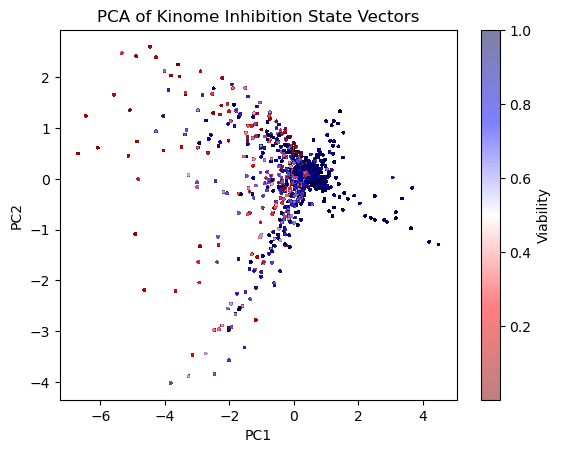

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_features = X_inhibition.values  #X_n2v_df.values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_final['viability'], cmap='seismic_r', s=1, alpha=0.5)
plt.colorbar(label='Viability')
plt.title('PCA of Kinome Inhibition State Vectors')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('../results/kis_pca.png', dpi=300, bbox_inches='tight')
plt.show()